## Extração dos dados

Inicialmente, irei acessar a API e usar a requisição do tipo get para obter os dados dela 

In [24]:
import requests
import json
import pandas as pd

In [25]:
response = requests.get("https://labdados.com/produtos")

In [ ]:
# Para visualização dos dados
data = response.json()

In [27]:
# Transformação para dataframe
df = pd.json_normalize(data)   # https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html
df

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Modelagem preditiva,livros,92.45,5.609697,01/01/2020,Thiago Silva,BA,1,cartao_credito,3,-13.29,-41.71
1,Iniciando em programação,livros,43.84,0.000000,01/01/2020,Mariana Ferreira,SP,5,cartao_credito,1,-22.19,-48.79
2,Pandeiro,instrumentos musicais,87.18,2.226512,01/01/2020,Thiago Silva,RJ,4,cartao_credito,4,-22.25,-42.66
3,Corda de pular,esporte e lazer,13.65,1.257926,01/01/2020,Camila Ribeiro,RJ,4,boleto,1,-22.25,-42.66
4,Dinossauro Rex,brinquedos,28.32,2.039059,01/01/2020,Juliana Costa,RJ,1,cartao_debito,1,-22.25,-42.66
...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Impressora,eletronicos,472.77,25.456706,31/12/2022,Camila Ribeiro,MT,4,cartao_credito,3,-12.64,-55.42
9431,Dashboards com Power BI,livros,54.85,3.451702,31/12/2022,Lucas Oliveira,RJ,5,cartao_credito,3,-22.25,-42.66
9432,Cubo mágico 8x8,brinquedos,19.74,0.000000,31/12/2022,Bianca Santos,RJ,5,cartao_credito,8,-22.25,-42.66
9433,Faqueiro,utilidades domesticas,52.49,0.000000,31/12/2022,Larissa Alves,DF,4,cartao_credito,5,-15.83,-47.86


## Transformação dos dados

Como objetivo deste exercício, iremos extrair os livros. Por isso, irei selecionar registros onde o campo "Categoria do Produto" seja do tipo "livros"

In [28]:
# Realizo filtragem 
df = df[df['Categoria do Produto'] == 'livros'] 
df

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Modelagem preditiva,livros,92.45,5.609697,01/01/2020,Thiago Silva,BA,1,cartao_credito,3,-13.29,-41.71
1,Iniciando em programação,livros,43.84,0.000000,01/01/2020,Mariana Ferreira,SP,5,cartao_credito,1,-22.19,-48.79
19,Iniciando em programação,livros,63.25,3.894137,01/01/2022,Juliana Costa,RJ,5,cartao_credito,4,-22.25,-42.66
33,Ciência de dados com python,livros,86.13,5.273176,01/02/2021,Camila Ribeiro,RJ,4,cartao_credito,3,-22.25,-42.66
35,Ciência de dados com python,livros,72.75,1.458158,01/02/2021,Beatriz Moraes,PR,4,cartao_credito,2,-24.89,-51.55
...,...,...,...,...,...,...,...,...,...,...,...,...
9371,Dashboards com Power BI,livros,41.27,2.728608,31/07/2022,João Souza,SC,5,cartao_credito,12,-27.45,-50.95
9375,Ciência de dados com python,livros,81.58,4.632666,31/08/2020,Juliana Costa,SP,5,cartao_credito,2,-22.19,-48.79
9381,Modelagem preditiva,livros,109.17,6.701389,31/08/2021,Felipe Santos,MG,3,cartao_credito,3,-18.10,-44.38
9393,Modelagem preditiva,livros,94.89,5.578872,31/08/2022,Pedro Gomes,SP,5,cartao_credito,1,-22.19,-48.79


O formato da data da compra precisa ser datetime

In [29]:
# Como os dados serão lançados no MySQL, preciso alterar o formato para ano-mes-dia, que é o formato aceito

df.loc[:,'Data da Compra'] = pd.to_datetime(df.loc[:,'Data da Compra'], format = "%d/%m/%Y")
df

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Modelagem preditiva,livros,92.45,5.609697,2020-01-01 00:00:00,Thiago Silva,BA,1,cartao_credito,3,-13.29,-41.71
1,Iniciando em programação,livros,43.84,0.000000,2020-01-01 00:00:00,Mariana Ferreira,SP,5,cartao_credito,1,-22.19,-48.79
19,Iniciando em programação,livros,63.25,3.894137,2022-01-01 00:00:00,Juliana Costa,RJ,5,cartao_credito,4,-22.25,-42.66
33,Ciência de dados com python,livros,86.13,5.273176,2021-02-01 00:00:00,Camila Ribeiro,RJ,4,cartao_credito,3,-22.25,-42.66
35,Ciência de dados com python,livros,72.75,1.458158,2021-02-01 00:00:00,Beatriz Moraes,PR,4,cartao_credito,2,-24.89,-51.55
...,...,...,...,...,...,...,...,...,...,...,...,...
9371,Dashboards com Power BI,livros,41.27,2.728608,2022-07-31 00:00:00,João Souza,SC,5,cartao_credito,12,-27.45,-50.95
9375,Ciência de dados com python,livros,81.58,4.632666,2020-08-31 00:00:00,Juliana Costa,SP,5,cartao_credito,2,-22.19,-48.79
9381,Modelagem preditiva,livros,109.17,6.701389,2021-08-31 00:00:00,Felipe Santos,MG,3,cartao_credito,3,-18.10,-44.38
9393,Modelagem preditiva,livros,94.89,5.578872,2022-08-31 00:00:00,Pedro Gomes,SP,5,cartao_credito,1,-22.19,-48.79


In [ ]:
# Caso eu os queira no formato csv
df.to_csv('./tabela_livros.csv', index=False) # index = False para não serem salvos os índices que o df costuma criar para cada coluna

## Lançamento no MySQL

Caso não tenha o MySQL instalado, siga o passo a passo no Linux:

instalação: sudo apt install mysql-server-8.0

verificação: sudo systemctl status mysql

acesso: sudo mysql

aqui, deve aparecer uma mensagem de boas vindas, seguida de  

mysql>

Crie usuário com:

mysql> CREATE USER 'seu-nome'@'localhost' IDENTIFIED BY 'sua-senha';

mysql> GRANT ALL PRIVILEGES ON *.* TO 'seu-nome'@'localhost';

mysql> FLUSH PRIVILEGES;


mysql> SELECT user, host FROM mysql.user; # para verificação

mysql> exit;

Ao sair, entre com: $ mysql -u seu-nome -p

e insira sua senha.

A partir daqui, já é possivel criar tabelas no próprio terminal, ou fazer isso no script 

In [31]:
import pymysql

In [ ]:
import os
from dotenv import load_dotenv

#Carrego as variáveis do arquivo .env no ambiente de trabalho
load_dotenv()

#A função os.getenv é usada para obter o valor das variáveis de ambiente
host = os.getenv("DB_HOST")
user = os.getenv("DB_USERNAME")
password = os.getenv("DB_PASSWORD")

cnx = pymysql.connect(
    host=host,
    user=user,
    password=password
)

print(cnx)

In [112]:
cursor = cnx.cursor()

In [113]:
# Verificação dos bancos de dados existentes
cursor.execute("SHOW DATABASES;")
for db in cursor:
    print(db)

('information_schema',)
('mysql',)
('performance_schema',)
('sys',)
('vendas_livros',)


In [35]:
df.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

In [78]:
# Criação da tabela tb_livros 
cursor.execute('''
    CREATE TABLE IF NOT EXISTS vendas_livros.tb_livros(
        id SERIAL PRIMARY KEY,
        Produto VARCHAR(100),
        Categoria_Produto VARCHAR(100),
        Preco FLOAT(10,2),
        Frete FLOAT(10,2),
        Data_Compra DATE,
        Vendedor VARCHAR(100),
        Local_Compra VARCHAR(100),
        Avaliacao_Compra INT,
        Tipo_Pagamento VARCHAR(100),
        Qntd_Parcelas INT,
        Latitude FLOAT(10,2),
        Longitude FLOAT(10,2)
    );
''') 

0

Equivalência dos nomes que estão no dataframe para ficarem iguais aos do banco

In [79]:
column_mapping = {
    'Produto': 'Produto',
    'Categoria do Produto': 'Categoria_Produto',
    'Preço': 'Preco',
    'Frete': 'Frete',
    'Data da Compra': 'Data_Compra',
    'Vendedor': 'Vendedor',
    'Local da compra': 'Local_Compra',
    'Avaliação da compra': 'Avaliacao_Compra',
    'Tipo de pagamento': 'Tipo_Pagamento',
    'Quantidade de parcelas': 'Qntd_Parcelas',
    'lat': 'Latitude',
    'lon': 'Longitude'
}

df = df.rename(columns=column_mapping)


In [ ]:
# Como quero apenas os valores de cada coluna, vou transformar essa visualização em uma tupla:
lista_dados = []

for i, row in df.iterrows():
    lista_dados.append(tuple(row))
    
lista_dados

In [92]:
sql = '''
    INSERT INTO vendas_livros.tb_livros 
    (Produto, Categoria_Produto, Preco, Frete, Data_Compra, Vendedor, Local_Compra, Avaliacao_Compra, Tipo_Pagamento, Qntd_Parcelas, Latitude, Longitude)
    VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s);
''' # $s é um marcador geral que serve para representar qualquer tipo de dado que temos na nossa tabela

In [ ]:
cursor.executemany(sql, lista_dados)
cnx.commit() # além de executar, é essencial efetuar o commit para salvar as alterações

In [ ]:
cursor.execute("SELECT * FROM vendas_livros.tb_livros;")
max_prints = 10
contador = 0

for row in cursor:
    if contador < max_prints: 
        print(row)  
        contador += 1  
    else:
        break  


(1, 'Modelagem preditiva', 'livros', 92.45, 5.61, datetime.date(2020, 1, 1), 'Thiago Silva', 'BA', 1, 'cartao_credito', 3, -13.29, -41.71)
(2, 'Iniciando em programação', 'livros', 43.84, 0.0, datetime.date(2020, 1, 1), 'Mariana Ferreira', 'SP', 5, 'cartao_credito', 1, -22.19, -48.79)
(3, 'Iniciando em programação', 'livros', 63.25, 3.89, datetime.date(2022, 1, 1), 'Juliana Costa', 'RJ', 5, 'cartao_credito', 4, -22.25, -42.66)
(4, 'Ciência de dados com python', 'livros', 86.13, 5.27, datetime.date(2021, 2, 1), 'Camila Ribeiro', 'RJ', 4, 'cartao_credito', 3, -22.25, -42.66)
(5, 'Ciência de dados com python', 'livros', 72.75, 1.46, datetime.date(2021, 2, 1), 'Beatriz Moraes', 'PR', 4, 'cartao_credito', 2, -24.89, -51.55)
(6, 'Iniciando em programação', 'livros', 61.73, 0.0, datetime.date(2021, 2, 1), 'Beatriz Moraes', 'SP', 4, 'cartao_credito', 1, -22.19, -48.79)
(7, 'Dashboards com Power BI', 'livros', 57.63, 9.31, datetime.date(2022, 2, 1), 'Bianca Santos', 'SP', 3, 'cartao_credito', 1

Para visualizar como tabela do MySQL, basta baixar a extensão MySQL no VSCode


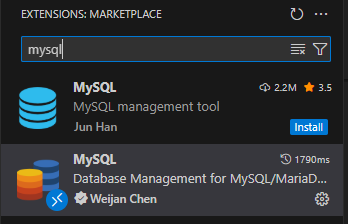

Basta fazer login e senha (aqueles criados no terminal) e acessar a tabela no database